In [2]:
from keras.layers import Input,Lambda, Dense, Flatten

In [3]:
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [7]:
#paths to the train, validation and test image datasets 
train_path = '/content/drive/MyDrive/dataset/Garbage-classification/'
valid_path = '/content/drive/MyDrive/dataset/Garbage-classification/'

# extract images to training set by applying data preprocessing and data augmentation
train_datagen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.1)

train_set = train_datagen.flow_from_directory(
    directory=train_path, target_size=(224,224), classes=['cardboard', 'glass', 'metal', 
                                                         'paper', 'plastic', 'trash'], batch_size=16, subset='training')


# extract images to validation set
valid_datagen = ImageDataGenerator(validation_split=0.1)

valid_set = valid_datagen.flow_from_directory(
    directory=valid_path, target_size=(224,224), classes=['cardboard', 'glass', 'metal', 
                                                         'paper', 'plastic', 'trash'], batch_size=16, subset='validation')

Found 2276 images belonging to 6 classes.
Found 251 images belonging to 6 classes.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
IMAGE_SIZE = [224,224]

In [9]:
vgg = VGG16(input_shape = IMAGE_SIZE + [3],weights = 'imagenet',include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


In [10]:
for layer in vgg.layers:
    layer.trainable = False

In [11]:
folders = glob('/content/drive/MyDrive/dataset/Garbage-classification/*')

In [12]:
x = Flatten()(vgg.output)

In [14]:
prediction = Dense(len(folders),activation='softmax')(x)

In [15]:
model = Model(inputs = vgg.input,outputs=prediction)

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [17]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
             metrics = ['accuracy'])

In [18]:
r = model.fit_generator(
  train_set,
  validation_data=valid_set,
  epochs=5,
  steps_per_epoch=len(train_set),
  validation_steps=len(valid_set)
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
143/143 [==============================] - 768s 5s/step - loss: 12.5992 - accuracy: 0.5219 - val_loss: 11.1900 - val_accuracy: 0.6813
Epoch 2/5
143/143 [==============================] - 32s 223ms/step - loss: 6.6901 - accuracy: 0.7764 - val_loss: 9.2970 - val_accuracy: 0.7809
Epoch 3/5
143/143 [==============================] - 32s 223ms/step - loss: 5.6167 - accuracy: 0.8102 - val_loss: 7.1541 - val_accuracy: 0.8287
Epoch 4/5
143/143 [==============================] - 32s 224ms/step - loss: 5.3524 - accuracy: 0.8276 - val_loss: 7.8789 - val_accuracy: 0.8327
Epoch 5/5
143/143 [==============================] - 32s 221ms/step - loss: 5.3172 - accuracy: 0.8511 - val_loss: 10.3103 - val_accuracy: 0.7729


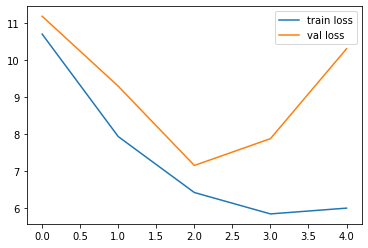

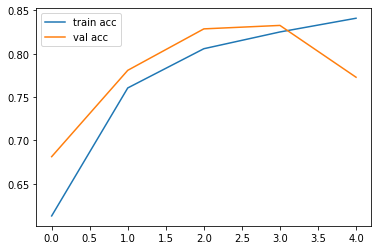

<Figure size 432x288 with 0 Axes>

In [19]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [23]:
import tensorflow as tf
from keras.models import load_model
model.save('/content/drive/MyDrive/dataset/Garbage-classification/classificationmodel.h5')

In [4]:
#import cv2
CATEGORIES = ["cardboard","glass","metal","paper","plastic","trash"]

In [5]:
import tensorflow as tf
model = tf.keras.models.load_model("usingmodel/classificationmodel.h5")

In [6]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
import numpy as np

In [11]:
image = load_img('usingmodel/plastic.JPG',target_size = (224,224))
#convert the image pixels into numpy array
image = img_to_array(image)
#reshape data for the model
image = image.reshape((1,image.shape[0],image.shape[1],image.shape[2]))
image = preprocess_input(image)
y = model.predict(image)
pred = np.argmax(y[0])
print(CATEGORIES[pred])

plastic
